## KC135WINGLET

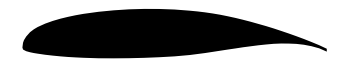

In [1]:
a = 'airfoils/kcwinglet-135/'
import pandas as pd
import numpy as np
import cv2
df=pd.read_csv('airfoils/kcwinglet-135/kc135winglet.dat', sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(a + 'kcwinglet-135'+'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

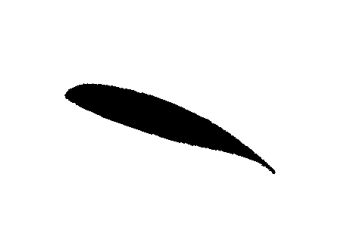

In [2]:
#varying angles of attack
# Reading the image
im = cv2.imread(a + 'kcwinglet-135.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig('airfoils/kcwinglet-135/AOA/kcwinglet-135' + '-AOA-' + str(i) + '.jpg')

## C5A

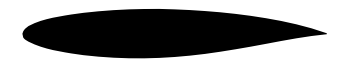

In [5]:
airfoil = 'c5a'
airfoil_file = 'c5a.dat'
airfoil_location = 'airfoils/' + airfoil + '/'
import pandas as pd
import numpy as np
import cv2
df=pd.read_csv(airfoil_location + airfoil_file, sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(airfoil_location + airfoil +'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

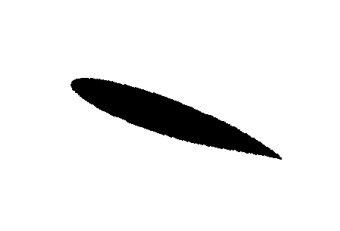

In [6]:
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig(airfoil_location + 'AOA/' + airfoil + '-AOA-' + str(i) + '.jpg')

## SC0619

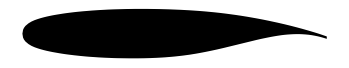

In [9]:
airfoil = 'sc0612'
airfoil_file = 'sc0612.txt'
airfoil_location = 'airfoils/' + airfoil + '/'
import pandas as pd
import numpy as np
import cv2
df=pd.read_csv(airfoil_location + airfoil_file, sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(airfoil_location + airfoil +'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

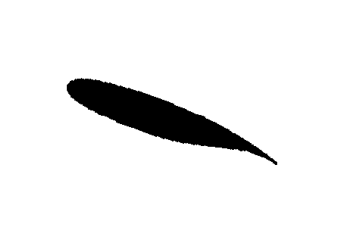

In [10]:
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig(airfoil_location + 'AOA/' + airfoil + '-AOA-' + str(i) + '.jpg')

## dfvlr

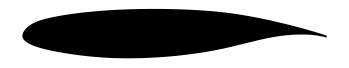

In [13]:
airfoil = 'dfvlr'
airfoil_file = 'dfvlr.txt'
airfoil_location = 'airfoils/' + airfoil + '/'
import pandas as pd
import numpy as np
import cv2
df=pd.read_csv(airfoil_location + airfoil_file, sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(airfoil_location + airfoil +'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

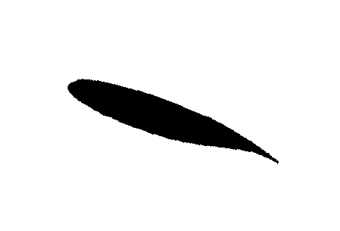

In [15]:
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig(airfoil_location + 'AOA/' + airfoil + '-AOA-' + str(i) + '.jpg')

## GRUMMAN K-3 AIRFOIL

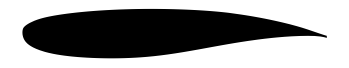

In [18]:
airfoil = 'GRUMMAN K-3 AIRFOIL'
airfoil_file = 'GRUMMAN K-3 AIRFOIL.txt'
airfoil_location = 'airfoils/' + airfoil + '/'
import pandas as pd
import numpy as np
import cv2
df=pd.read_csv(airfoil_location + airfoil_file, sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(airfoil_location + airfoil +'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

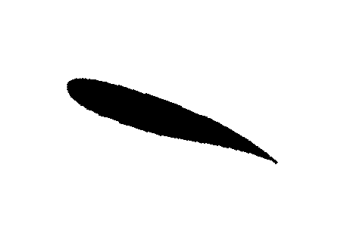

In [24]:
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig(airfoil_location + 'AOA/' + airfoil + '-AOA-' + str(i) + '.jpg')

## rae2822

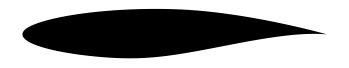

In [26]:
airfoil = 'rae2822'
airfoil_file = 'rae2822.dat'
airfoil_location = 'airfoils/' + airfoil + '/'
import pandas as pd
import numpy as np
import cv2
df=pd.read_csv(airfoil_location + airfoil_file, sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(airfoil_location + airfoil +'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

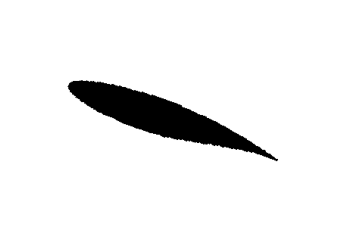

In [28]:
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    plt.savefig(airfoil_location + 'AOA/' + airfoil + '-AOA-' + str(i) + '.jpg')

## sc0412

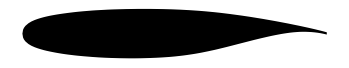

In [30]:
airfoil = 'sc0412'
airfoil_file = 'sc0412.txt'
airfoil_location = 'airfoils/' + airfoil + '/'
import pandas as pd
import numpy as np
import cv2
df=pd.read_csv(airfoil_location + airfoil_file, sep='\s+',header=None)
x = np.array(df[0])
y = np.array(df[1])
import matplotlib.pyplot as plt
from matplotlib import transforms

#coord = df.values
#create lists of x and y values
plt.figure(figsize=(6, 1))
plt.fill(x,y, "black")
plt.axis('off')

plt.savefig(airfoil_location + airfoil +'.jpg', bbox_inches='tight', pad_inches=1, dpi=100)
#plt.figure()
#plt.plot(xs,ys) 
#plt.show() # if you need...

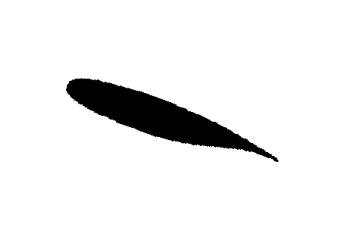

In [32]:
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    count = 0
    for i in np.arange(0.72, 1.42, 0.02):
        print(np.round(i, 2))
        while i < 1.4:
            count+=1
            plt.savefig(airfoil + + str(count) + '.jpg')

## c5a

Generating -20-0.7
Generating -20-0.72
Generating -20-0.74
Generating -20-0.76
Generating -20-0.78
Generating -20-0.8
Generating -20-0.82
Generating -20-0.84
Generating -20-0.86
Generating -20-0.88
Generating -20-0.9
Generating -20-0.92
Generating -20-0.94
Generating -20-0.96
Generating -20-0.98
Generating -20-1.0
Generating -20-1.02
Generating -20-1.04
Generating -20-1.06
Generating -20-1.08
Generating -20-1.1
Generating -20-1.12
Generating -20-1.14
Generating -20-1.16
Generating -20-1.18
Generating -20-1.2
Generating -20-1.22
Generating -20-1.24
Generating -20-1.26
Generating -20-1.28
Generating -20-1.3
Generating -20-1.32
Generating -20-1.34
Generating -20-1.36
Generating -20-1.38
Generating -20-1.4
Generating -19-0.7
Generating -19-0.72
Generating -19-0.74
Generating -19-0.76
Generating -19-0.78
Generating -19-0.8
Generating -19-0.82
Generating -19-0.84
Generating -19-0.86
Generating -19-0.88
Generating -19-0.9
Generating -19-0.92
Generating -19-0.94
Generating -19-0.96
Generating 

Generating -9-1.1
Generating -9-1.12
Generating -9-1.14
Generating -9-1.16
Generating -9-1.18
Generating -9-1.2
Generating -9-1.22
Generating -9-1.24
Generating -9-1.26
Generating -9-1.28
Generating -9-1.3
Generating -9-1.32
Generating -9-1.34
Generating -9-1.36
Generating -9-1.38
Generating -9-1.4
Generating -8-0.7
Generating -8-0.72
Generating -8-0.74
Generating -8-0.76
Generating -8-0.78
Generating -8-0.8
Generating -8-0.82
Generating -8-0.84
Generating -8-0.86
Generating -8-0.88
Generating -8-0.9
Generating -8-0.92
Generating -8-0.94
Generating -8-0.96
Generating -8-0.98
Generating -8-1.0
Generating -8-1.02
Generating -8-1.04
Generating -8-1.06
Generating -8-1.08
Generating -8-1.1
Generating -8-1.12
Generating -8-1.14
Generating -8-1.16
Generating -8-1.18
Generating -8-1.2
Generating -8-1.22
Generating -8-1.24
Generating -8-1.26
Generating -8-1.28
Generating -8-1.3
Generating -8-1.32
Generating -8-1.34
Generating -8-1.36
Generating -8-1.38
Generating -8-1.4
Generating -7-0.7
Genera

Generating 3-1.34
Generating 3-1.36
Generating 3-1.38
Generating 3-1.4
Generating 4-0.7
Generating 4-0.72
Generating 4-0.74
Generating 4-0.76
Generating 4-0.78
Generating 4-0.8
Generating 4-0.82
Generating 4-0.84
Generating 4-0.86
Generating 4-0.88
Generating 4-0.9
Generating 4-0.92
Generating 4-0.94
Generating 4-0.96
Generating 4-0.98
Generating 4-1.0
Generating 4-1.02
Generating 4-1.04
Generating 4-1.06
Generating 4-1.08
Generating 4-1.1
Generating 4-1.12
Generating 4-1.14
Generating 4-1.16
Generating 4-1.18
Generating 4-1.2
Generating 4-1.22
Generating 4-1.24
Generating 4-1.26
Generating 4-1.28
Generating 4-1.3
Generating 4-1.32
Generating 4-1.34
Generating 4-1.36
Generating 4-1.38
Generating 4-1.4
Generating 5-0.7
Generating 5-0.72
Generating 5-0.74
Generating 5-0.76
Generating 5-0.78
Generating 5-0.8
Generating 5-0.82
Generating 5-0.84
Generating 5-0.86
Generating 5-0.88
Generating 5-0.9
Generating 5-0.92
Generating 5-0.94
Generating 5-0.96
Generating 5-0.98
Generating 5-1.0
Gener

Generating 16-0.96
Generating 16-0.98
Generating 16-1.0
Generating 16-1.02
Generating 16-1.04
Generating 16-1.06
Generating 16-1.08
Generating 16-1.1
Generating 16-1.12
Generating 16-1.14
Generating 16-1.16
Generating 16-1.18
Generating 16-1.2
Generating 16-1.22
Generating 16-1.24
Generating 16-1.26
Generating 16-1.28
Generating 16-1.3
Generating 16-1.32
Generating 16-1.34
Generating 16-1.36
Generating 16-1.38
Generating 16-1.4
Generating 17-0.7
Generating 17-0.72
Generating 17-0.74
Generating 17-0.76
Generating 17-0.78
Generating 17-0.8
Generating 17-0.82
Generating 17-0.84
Generating 17-0.86
Generating 17-0.88
Generating 17-0.9
Generating 17-0.92
Generating 17-0.94
Generating 17-0.96
Generating 17-0.98
Generating 17-1.0
Generating 17-1.02
Generating 17-1.04
Generating 17-1.06
Generating 17-1.08
Generating 17-1.1
Generating 17-1.12
Generating 17-1.14
Generating 17-1.16
Generating 17-1.18
Generating 17-1.2
Generating 17-1.22
Generating 17-1.24
Generating 17-1.26
Generating 17-1.28
Gene

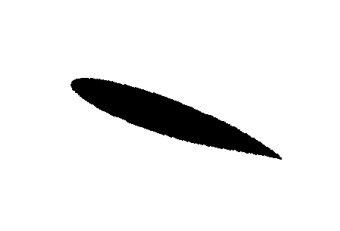

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
airfoil = 'c5a'
airfoil_file = 'c5a.dat'
airfoil_location = 'airfoils/' + airfoil + '/'
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    j = 0.70
    while j < 1.44:
        print("Generating " + str(i) + '-' +str(j))
        plt.savefig("c5a-images/"+str(i) + '_' + str(j) + '.jpg')
        j+=0.02
        j = np.round(j, 2)
        if j == 1.42:
            break

## dfvlr

Generating -20-0.7
Generating -20-0.72
Generating -20-0.74
Generating -20-0.76
Generating -20-0.78
Generating -20-0.8
Generating -20-0.82
Generating -20-0.84
Generating -20-0.86
Generating -20-0.88
Generating -20-0.9
Generating -20-0.92
Generating -20-0.94
Generating -20-0.96
Generating -20-0.98
Generating -20-1.0
Generating -20-1.02
Generating -20-1.04
Generating -20-1.06
Generating -20-1.08
Generating -20-1.1
Generating -20-1.12
Generating -20-1.14
Generating -20-1.16
Generating -20-1.18
Generating -20-1.2
Generating -20-1.22
Generating -20-1.24
Generating -20-1.26
Generating -20-1.28
Generating -20-1.3
Generating -20-1.32
Generating -20-1.34
Generating -20-1.36
Generating -20-1.38
Generating -20-1.4
Generating -19-0.7
Generating -19-0.72
Generating -19-0.74
Generating -19-0.76
Generating -19-0.78
Generating -19-0.8
Generating -19-0.82
Generating -19-0.84
Generating -19-0.86
Generating -19-0.88
Generating -19-0.9
Generating -19-0.92
Generating -19-0.94
Generating -19-0.96
Generating 

Generating -9-1.1
Generating -9-1.12
Generating -9-1.14
Generating -9-1.16
Generating -9-1.18
Generating -9-1.2
Generating -9-1.22
Generating -9-1.24
Generating -9-1.26
Generating -9-1.28
Generating -9-1.3
Generating -9-1.32
Generating -9-1.34
Generating -9-1.36
Generating -9-1.38
Generating -9-1.4
Generating -8-0.7
Generating -8-0.72
Generating -8-0.74
Generating -8-0.76
Generating -8-0.78
Generating -8-0.8
Generating -8-0.82
Generating -8-0.84
Generating -8-0.86
Generating -8-0.88
Generating -8-0.9
Generating -8-0.92
Generating -8-0.94
Generating -8-0.96
Generating -8-0.98
Generating -8-1.0
Generating -8-1.02
Generating -8-1.04
Generating -8-1.06
Generating -8-1.08
Generating -8-1.1
Generating -8-1.12
Generating -8-1.14
Generating -8-1.16
Generating -8-1.18
Generating -8-1.2
Generating -8-1.22
Generating -8-1.24
Generating -8-1.26
Generating -8-1.28
Generating -8-1.3
Generating -8-1.32
Generating -8-1.34
Generating -8-1.36
Generating -8-1.38
Generating -8-1.4
Generating -7-0.7
Genera

Generating 3-1.34
Generating 3-1.36
Generating 3-1.38
Generating 3-1.4
Generating 4-0.7
Generating 4-0.72
Generating 4-0.74
Generating 4-0.76
Generating 4-0.78
Generating 4-0.8
Generating 4-0.82
Generating 4-0.84
Generating 4-0.86
Generating 4-0.88
Generating 4-0.9
Generating 4-0.92
Generating 4-0.94
Generating 4-0.96
Generating 4-0.98
Generating 4-1.0
Generating 4-1.02
Generating 4-1.04
Generating 4-1.06
Generating 4-1.08
Generating 4-1.1
Generating 4-1.12
Generating 4-1.14
Generating 4-1.16
Generating 4-1.18
Generating 4-1.2
Generating 4-1.22
Generating 4-1.24
Generating 4-1.26
Generating 4-1.28
Generating 4-1.3
Generating 4-1.32
Generating 4-1.34
Generating 4-1.36
Generating 4-1.38
Generating 4-1.4
Generating 5-0.7
Generating 5-0.72
Generating 5-0.74
Generating 5-0.76
Generating 5-0.78
Generating 5-0.8
Generating 5-0.82
Generating 5-0.84
Generating 5-0.86
Generating 5-0.88
Generating 5-0.9
Generating 5-0.92
Generating 5-0.94
Generating 5-0.96
Generating 5-0.98
Generating 5-1.0
Gener

Generating 16-0.96
Generating 16-0.98
Generating 16-1.0
Generating 16-1.02
Generating 16-1.04
Generating 16-1.06
Generating 16-1.08
Generating 16-1.1
Generating 16-1.12
Generating 16-1.14
Generating 16-1.16
Generating 16-1.18
Generating 16-1.2
Generating 16-1.22
Generating 16-1.24
Generating 16-1.26
Generating 16-1.28
Generating 16-1.3
Generating 16-1.32
Generating 16-1.34
Generating 16-1.36
Generating 16-1.38
Generating 16-1.4
Generating 17-0.7
Generating 17-0.72
Generating 17-0.74
Generating 17-0.76
Generating 17-0.78
Generating 17-0.8
Generating 17-0.82
Generating 17-0.84
Generating 17-0.86
Generating 17-0.88
Generating 17-0.9
Generating 17-0.92
Generating 17-0.94
Generating 17-0.96
Generating 17-0.98
Generating 17-1.0
Generating 17-1.02
Generating 17-1.04
Generating 17-1.06
Generating 17-1.08
Generating 17-1.1
Generating 17-1.12
Generating 17-1.14
Generating 17-1.16
Generating 17-1.18
Generating 17-1.2
Generating 17-1.22
Generating 17-1.24
Generating 17-1.26
Generating 17-1.28
Gene

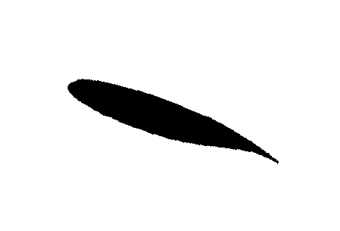

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
airfoil = 'dfvlr'
airfoil_file = 'dfvlr.dat'
airfoil_location = 'airfoils/' + airfoil + '/'
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    j = 0.70
    while j < 1.44:
        print("Generating " + str(i) + '-' +str(j))
        plt.savefig("dflvr-images/"+str(i) + '_' + str(j) + '.jpg')
        j+=0.02
        j = np.round(j, 2)
        if j == 1.42:
            break

## sc0412

Generating -20-0.7
Generating -20-0.72
Generating -20-0.74
Generating -20-0.76
Generating -20-0.78
Generating -20-0.8
Generating -20-0.82
Generating -20-0.84
Generating -20-0.86
Generating -20-0.88
Generating -20-0.9
Generating -20-0.92
Generating -20-0.94
Generating -20-0.96
Generating -20-0.98
Generating -20-1.0
Generating -20-1.02
Generating -20-1.04
Generating -20-1.06
Generating -20-1.08
Generating -20-1.1
Generating -20-1.12
Generating -20-1.14
Generating -20-1.16
Generating -20-1.18
Generating -20-1.2
Generating -20-1.22
Generating -20-1.24
Generating -20-1.26
Generating -20-1.28
Generating -20-1.3
Generating -20-1.32
Generating -20-1.34
Generating -20-1.36
Generating -20-1.38
Generating -20-1.4
Generating -19-0.7
Generating -19-0.72
Generating -19-0.74
Generating -19-0.76
Generating -19-0.78
Generating -19-0.8
Generating -19-0.82
Generating -19-0.84
Generating -19-0.86
Generating -19-0.88
Generating -19-0.9
Generating -19-0.92
Generating -19-0.94
Generating -19-0.96
Generating 

Generating -9-1.1
Generating -9-1.12
Generating -9-1.14
Generating -9-1.16
Generating -9-1.18
Generating -9-1.2
Generating -9-1.22
Generating -9-1.24
Generating -9-1.26
Generating -9-1.28
Generating -9-1.3
Generating -9-1.32
Generating -9-1.34
Generating -9-1.36
Generating -9-1.38
Generating -9-1.4
Generating -8-0.7
Generating -8-0.72
Generating -8-0.74
Generating -8-0.76
Generating -8-0.78
Generating -8-0.8
Generating -8-0.82
Generating -8-0.84
Generating -8-0.86
Generating -8-0.88
Generating -8-0.9
Generating -8-0.92
Generating -8-0.94
Generating -8-0.96
Generating -8-0.98
Generating -8-1.0
Generating -8-1.02
Generating -8-1.04
Generating -8-1.06
Generating -8-1.08
Generating -8-1.1
Generating -8-1.12
Generating -8-1.14
Generating -8-1.16
Generating -8-1.18
Generating -8-1.2
Generating -8-1.22
Generating -8-1.24
Generating -8-1.26
Generating -8-1.28
Generating -8-1.3
Generating -8-1.32
Generating -8-1.34
Generating -8-1.36
Generating -8-1.38
Generating -8-1.4
Generating -7-0.7
Genera

Generating 3-1.34
Generating 3-1.36
Generating 3-1.38
Generating 3-1.4
Generating 4-0.7
Generating 4-0.72
Generating 4-0.74
Generating 4-0.76
Generating 4-0.78
Generating 4-0.8
Generating 4-0.82
Generating 4-0.84
Generating 4-0.86
Generating 4-0.88
Generating 4-0.9
Generating 4-0.92
Generating 4-0.94
Generating 4-0.96
Generating 4-0.98
Generating 4-1.0
Generating 4-1.02
Generating 4-1.04
Generating 4-1.06
Generating 4-1.08
Generating 4-1.1
Generating 4-1.12
Generating 4-1.14
Generating 4-1.16
Generating 4-1.18
Generating 4-1.2
Generating 4-1.22
Generating 4-1.24
Generating 4-1.26
Generating 4-1.28
Generating 4-1.3
Generating 4-1.32
Generating 4-1.34
Generating 4-1.36
Generating 4-1.38
Generating 4-1.4
Generating 5-0.7
Generating 5-0.72
Generating 5-0.74
Generating 5-0.76
Generating 5-0.78
Generating 5-0.8
Generating 5-0.82
Generating 5-0.84
Generating 5-0.86
Generating 5-0.88
Generating 5-0.9
Generating 5-0.92
Generating 5-0.94
Generating 5-0.96
Generating 5-0.98
Generating 5-1.0
Gener

Generating 16-0.96
Generating 16-0.98
Generating 16-1.0
Generating 16-1.02
Generating 16-1.04
Generating 16-1.06
Generating 16-1.08
Generating 16-1.1
Generating 16-1.12
Generating 16-1.14
Generating 16-1.16
Generating 16-1.18
Generating 16-1.2
Generating 16-1.22
Generating 16-1.24
Generating 16-1.26
Generating 16-1.28
Generating 16-1.3
Generating 16-1.32
Generating 16-1.34
Generating 16-1.36
Generating 16-1.38
Generating 16-1.4
Generating 17-0.7
Generating 17-0.72
Generating 17-0.74
Generating 17-0.76
Generating 17-0.78
Generating 17-0.8
Generating 17-0.82
Generating 17-0.84
Generating 17-0.86
Generating 17-0.88
Generating 17-0.9
Generating 17-0.92
Generating 17-0.94
Generating 17-0.96
Generating 17-0.98
Generating 17-1.0
Generating 17-1.02
Generating 17-1.04
Generating 17-1.06
Generating 17-1.08
Generating 17-1.1
Generating 17-1.12
Generating 17-1.14
Generating 17-1.16
Generating 17-1.18
Generating 17-1.2
Generating 17-1.22
Generating 17-1.24
Generating 17-1.26
Generating 17-1.28
Gene

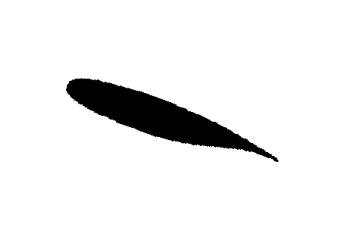

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
airfoil = 'sc0412'
airfoil_file = 'sc0412.dat'
airfoil_location = 'airfoils/' + airfoil + '/'
#varying angles of attack
# Reading the image
im = cv2.imread(airfoil_location + airfoil + '.jpg')
im2 = cv2.imread('output.png')
#im2 = cv2.imread('output.png')
# Converting image to grayscale
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Thresholding and getting contours from the image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_copy = im.copy()
cv2.drawContours(im_copy, contours, 1, (255, 0, 0), 3)
#plt.imshow(im_copy)
#plt.axis("off");

def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    cnt_scaled = cnt_norm * scale
    cnt_scaled = cnt_scaled + [cx, cy]
    cnt_scaled = cnt_scaled.astype(np.int32)

    return cnt_scaled

def rotate_contour(cnt, angle):
    global M
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cnt_norm = cnt - [cx, cy]
    
    coordinates = cnt_norm[:, 0, :]
    xs, ys = coordinates[:, 0], coordinates[:, 1]
    thetas, rhos = cart2pol(xs, ys)

    thetas = np.rad2deg(thetas)
    thetas = (thetas + angle) % 360
    thetas = np.deg2rad(thetas)
    
    xs, ys = pol2cart(thetas, rhos)
    
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys

    cnt_rotated = cnt_norm + [cx, cy]
    cnt_rotated = cnt_rotated.astype(np.int32)

    return cnt_rotated

#cnt_rotated = rotate_contour(contours[0], 20)
#im_copy = im.copy()
#cnt_scaled = scale_contour(cnt_rotated, 0.3)
#cv2.drawContours(im_copy, contours, 0, (255, 0, 0), 3)
#cv2.drawContours(im_copy, [cnt_scaled], 0, (0, 0, 0), -1)
#cv2.drawContours(im_copy, [cnt_rotated], 0, (0, 0, 0), -1)

#plt.imshow(im_copy)
#plt.axis("off");
angle_of_attack = range(-20, 21)

for i in angle_of_attack:
    im2 = cv2.imread('output.png')
    cnt_scaled = scale_contour(contours[1], 0.7)
    cnt_rotated = rotate_contour(cnt_scaled, i)
    cnt_translated = cnt_rotated + (-100,10)
    #cv2.drawContours(im2, contours, 1, (0, 0, 0), 3)
    cv2.drawContours(im2, [cnt_translated], 0, (0,0, 0), -1)
    plt.imshow(im2)
    plt.axis("off");
    j = 0.70
    while j < 1.44:
        print("Generating " + str(i) + '-' +str(j))
        plt.savefig("sc0412-images/"+str(i) + '_' + str(j) + '.jpg')
        j+=0.02
        j = np.round(j, 2)
        if j == 1.42:
            break